# Importing Required Packages

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Train and Validation CSVs

In [90]:
january_data=pd.read_parquet('data/NYCTaxi/ForHire/fhv_tripdata_2021-01.parquet')
february_data=pd.read_parquet('data/NYCTaxi/ForHire/fhv_tripdata_2021-02.parquet')

In [91]:
january_data.dtypes

dispatching_base_num              object
pickup_datetime           datetime64[ns]
dropOff_datetime          datetime64[ns]
PUlocationID                     float64
DOlocationID                     float64
SR_Flag                           object
Affiliated_base_number            object
dtype: object

# Data Preparation

In [92]:
january_data['duration']=january_data['dropOff_datetime']-january_data['pickup_datetime']

In [93]:
january_data['duration']=january_data.duration.apply(lambda x : x.total_seconds()/60)

In [94]:
january_data.duration.mean()

19.167224093791006

### Distribution of Target Variable

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

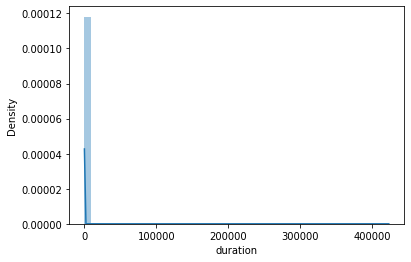

In [95]:
sns.distplot(january_data.duration)

In [96]:
january_data.duration.describe()

count    1.154112e+06
mean     1.916722e+01
std      3.986922e+02
min      1.666667e-02
25%      7.766667e+00
50%      1.340000e+01
75%      2.228333e+01
max      4.233710e+05
Name: duration, dtype: float64

In [97]:
january_data_cleaned=january_data[(january_data.duration>=1) & (january_data.duration<=60)]

In [98]:
print(f"Shape of uncleaned Data Frame: {len(january_data)}")
print(f"Shape of cleaned Data Frame: {len(january_data_cleaned)}")
print(f"Number of Inconsistent records dropped: {len(january_data)-len(january_data_cleaned)}")

Shape of uncleaned Data Frame: 1154112
Shape of cleaned Data Frame: 1109826
Number of Inconsistent records dropped: 44286


In [99]:
january_data_cleaned['PUlocationID']=january_data_cleaned['PUlocationID'].fillna(-1)
january_data_cleaned['DOlocationID']=january_data_cleaned['DOlocationID'].fillna(-1)

/Users/tng/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/tng/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [100]:
print("Composition of Null values in Pickup Location",len(january_data_cleaned[january_data_cleaned['PUlocationID']==-1])/len(january_data_cleaned)*100)

Composition of Null values in Pickup Location 83.52732770722618


In [101]:
features=['PUlocationID','DOlocationID']

In [102]:
january_data_cleaned[features]=january_data_cleaned[categorical].astype(str)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [103]:
train_records=january_data_cleaned[features].to_dict(orient='records')

In [104]:
from sklearn.feature_extraction import DictVectorizer
dictVectorizer=DictVectorizer()
x_train=dictVectorizer.fit_transform(train_records)

In [105]:
print("Total Number of Features after One Hot Encoding: ",len(dictVectorizer.get_feature_names()))

Total Number of Features after One Hot Encoding:  525


In [106]:
target=january_data_cleaned['duration'].values

# Training a model

In [64]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Evaluating the model

In [67]:
from sklearn.metrics import mean_squared_error
y_pred=lr.predict(x_train)
print(f"RMSE: {np.sqrt(mean_squared_error(target,y_pred))}")

RMSE: 10.528519107204898


# Placing all the code snippets into some meaningful functions 

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [109]:
def get_and_preprocess_data(filePath,dictVectorizer,mode):
    print(f"Details about file {filePath.split('/')[-1]}")
    data=pd.read_parquet(filePath)
    
    # Creating a duration feature
    data['duration']=data['dropOff_datetime']-data['pickup_datetime']
    data['duration']=data.duration.apply(lambda x : x.total_seconds()/60)
    
    # Information about Distribution of the Target column
    print(f"Mean Duration is {data.duration.mean()}")
    print("Distribution of the Duration")
    sns.distplot(january_data.duration)
    plt.show()
    
    # Foucsing on the trips with duration greater than or equal to a minute and less than or equal to an hour
    data_cleaned=data[(data.duration>=1) & (data.duration<=60)]
    print(f"Shape of uncleaned data is : {len(data)}")
    print(f"Shape of cleaned Data is : {len(data_cleaned)}")
    print(f"Number of Inconsistent records dropped : {len(data)-len(data_cleaned)}")
    
    # Handling the Null Values in the PickUp and DropOff Location IDs
    data_cleaned['PUlocationID']=data_cleaned['PUlocationID'].fillna(-1)
    data_cleaned['DOlocationID']=data_cleaned['DOlocationID'].fillna(-1)
    print(f"Fraction of missing values in Pickup Loaction : \
          {len(data_cleaned[data_cleaned['PUlocationID']==-1])/len(data_cleaned)*100}%")
    print(f"Fraction of missing values in Drop off Loaction : \
          {len(data_cleaned[data_cleaned['DOlocationID']==-1])/len(data_cleaned)*100}%")
    
    # Creating the dictionaries of input features using DictVectorizer
    features=['PUlocationID','DOlocationID']
    data_cleaned[features]=data_cleaned[categorical].astype(str)
    train_dicts=data_cleaned[features].to_dict(orient='records')
    target=data_cleaned['duration'].values
    
    # Returning X_train and Y_train or X_test and Y_test based on the argument 'mode'
    if mode=='train':
        x_train=dictVectorizer.fit_transform(train_dicts)
        print(f"Total number of Features : {len(dictVectorizer.get_feature_names())}")
        return dictVectorizer,x_train,target
    elif mode=='test':
        x_test=dictVectorizer.transform(train_dicts)
        print(f"Total number of Features : {len(dictVectorizer.get_feature_names())}")
        return x_test,target

In [110]:
def train_and_evaluate_model(model,trainFilePath,testFilePath):
    print(model)
    
    print("preparing data for training the model")
    dv,x_train,y_train=get_and_preprocess_data(trainFilePath,DictVectorizer(),'train')
    
    print("preparing data for testing the model")
    x_test,y_test=get_and_preprocess_data(testFilePath,dv,'test')
    
    # Fitting the model with train data
    model.fit(x_train,y_train)
    
    # Making Prediction on the test
    y_pred=model.predict(x_test)
    
    # Printing Root Mean Squared Error of the prediction
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test,y_pred))}")
    return model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
preparing data for training the model
Details about file fhv_tripdata_2021-01.parquet
Mean Duration is 19.167224093791006
Distribution of the Duration


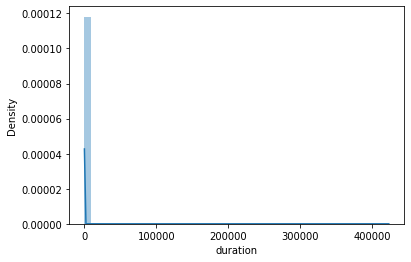

Shape of uncleaned data is : 1154112
Shape of cleaned Data is : 1109826
Number of Inconsistent records dropped : 44286
Fraction of missing values in Pickup Loaction :           83.52732770722618%
Fraction of missing values in Drop off Loaction :           13.327044059158824%
Total number of Features : 525
preparing data for testing the model
Details about file fhv_tripdata_2021-02.parquet
Mean Duration is 20.706986225199763
Distribution of the Duration


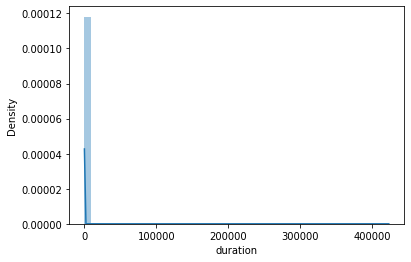

Shape of uncleaned data is : 1037692
Shape of cleaned Data is : 990113
Number of Inconsistent records dropped : 47579
Fraction of missing values in Pickup Loaction :           85.71354986754038%
Fraction of missing values in Drop off Loaction :           13.610567682678642%
Total number of Features : 525
RMSE: 11.014283144669959


In [111]:
trained_model=train_and_evaluate_model(LinearRegression(),'data/NYCTaxi/ForHire/fhv_tripdata_2021-01.parquet',
                                      'data/NYCTaxi/ForHire/fhv_tripdata_2021-02.parquet')